In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

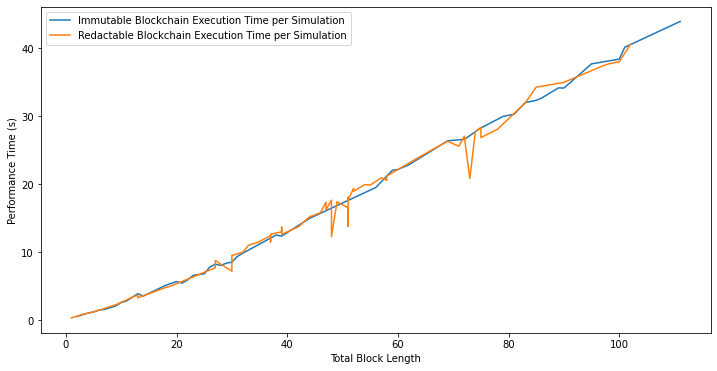

In [3]:
df_normal = pd.read_csv('time.csv', delimiter=',')
df_redact = pd.read_csv('time_redact.csv', delimiter=',')
df_normal.drop_duplicates(subset='Total Blocks', inplace=True, keep='first')
df_normal.drop_duplicates(subset='Total Blocks', inplace=True, keep='first')
df_normal.sort_values(by='Total Blocks', inplace=True)
df_redact.sort_values(by='Total Blocks', inplace=True)

# plt.figure(figsize=(12,8))
fig, ax = plt.subplots(figsize=(12, 6))

plt.plot('Total Blocks', 'Performance Time', data=df_normal, label='Immutable Blockchain Execution Time per Simulation')
plt.plot('Total Blocks', 'Performance Time', data=df_redact, label='Redactable Blockchain Execution Time per Simulation')

plt.xlabel("Total Block Length")
plt.ylabel("Performance Time (s)")

# plt.plot( df_normal['Total Blocks'], df_normal['Performance Time'], data=df_normal, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.legend()
plt.show()

In [4]:
df = pd.read_csv('tx_time.csv', delimiter=',')
df.tail()

,Miner ID,Block Depth,Transaction ID,Redaction Profit,Performance Time (ms),Blockchain Length,# of Tx
1784,0,7,44578325573,0.000983,31.681061,7,14939
1785,0,6,18987728853,0.035983,31.567097,7,15131
1786,0,7,17171750527,0.055714,30.613899,7,14938
1787,0,2,55017204960,0.068670,31.907797,7,15177
1788,0,1,47562616121,0.004747,31.207561,3,1658


In [5]:
for i, r in df.iterrows():
    if r['Performance Time (ms)'] == 0:
        df.drop(i, inplace=True)
    if r['# of Tx'] >= 500:
        df.drop(i, inplace=True)

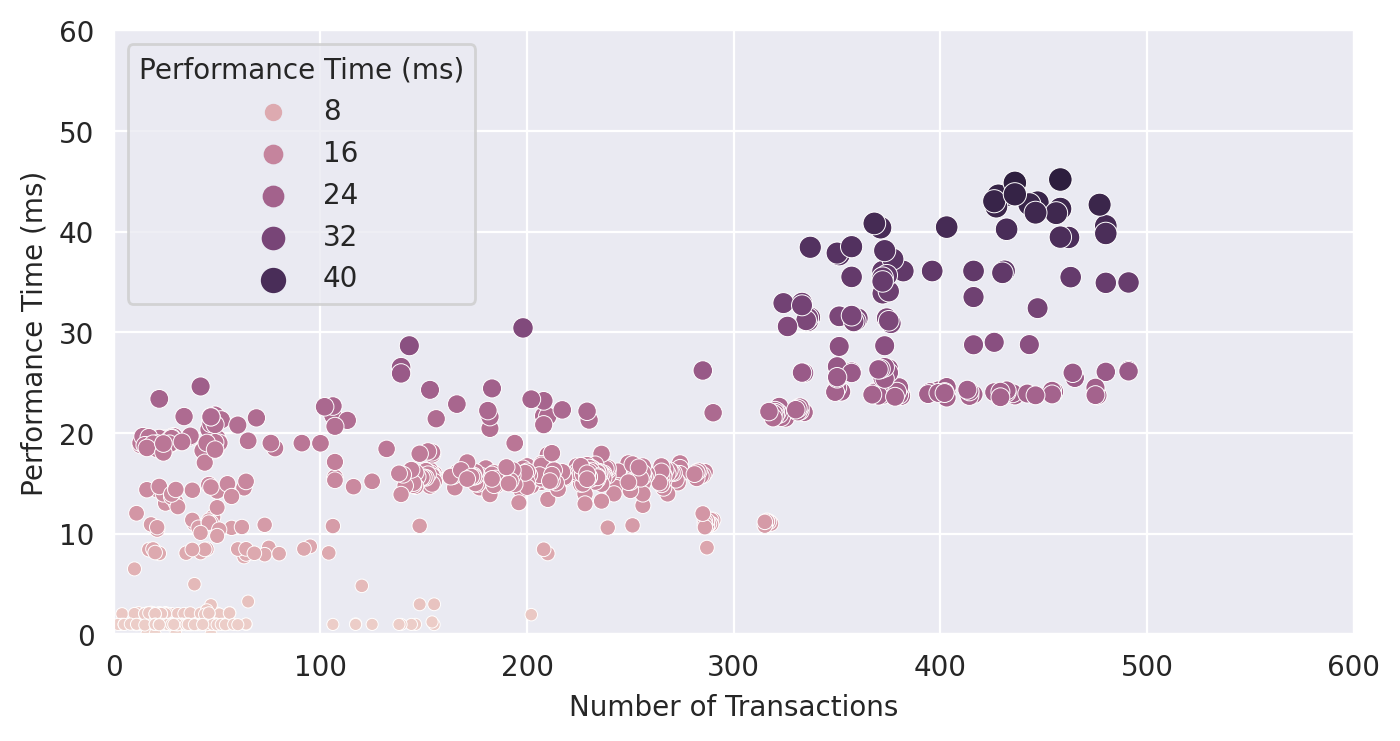

In [6]:

plt.figure(figsize=(8,4), dpi=200)
 
# set styling on a single chart
with sns.axes_style('darkgrid'):
  ax = sns.scatterplot(data=df,
                       x='# of Tx', 
                       y='Performance Time (ms)',
                       hue='Performance Time (ms)',
                       size='Performance Time (ms)')
 
  ax.set(ylim=(0, 60),
        xlim=(0, 600),
        ylabel='Performance Time (ms)',
        xlabel='Number of Transactions')

In [7]:
df.drop_duplicates(subset='# of Tx', inplace=True, keep='first')
df.tail()

,Miner ID,Block Depth,Transaction ID,Redaction Profit,Performance Time (ms),Blockchain Length,# of Tx
1617,0,1,16645834202,0.056334,28.680563,1,143
1619,0,1,13708478792,0.090432,14.769554,1,141
1620,0,1,57269382524,0.011891,15.868425,1,140
1621,0,1,52288646113,0.018897,0.995159,1,139
1626,0,1,35718654505,0.041061,15.991926,1,138


<AxesSubplot:title={'center':'Number of Transaction vs Redaction Performance Time (ms)'}, xlabel='# of Tx', ylabel='Performance Time (ms)'>

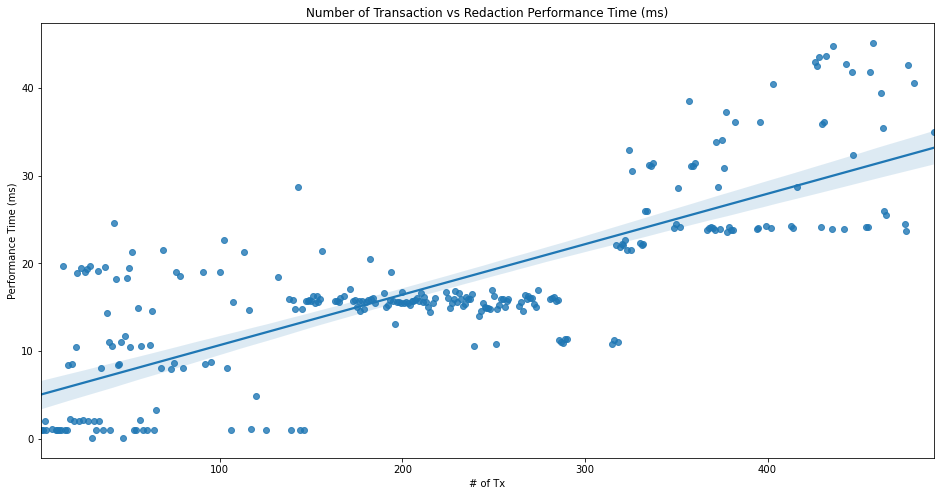

In [8]:
fig_dims = (16, 8)
fig, ax = plt.subplots(figsize=fig_dims)
ax.set_title('Number of Transaction vs Redaction Performance Time (ms)')

sns.regplot(data=df, 
            x='# of Tx',
            y='Performance Time (ms)',
            ax=ax)

<AxesSubplot:title={'center':'Number of Transaction per block vs Redaction Performance Time (ms) in Decentralized Setting'}, xlabel='# of Tx', ylabel='Performance Time (ms)'>

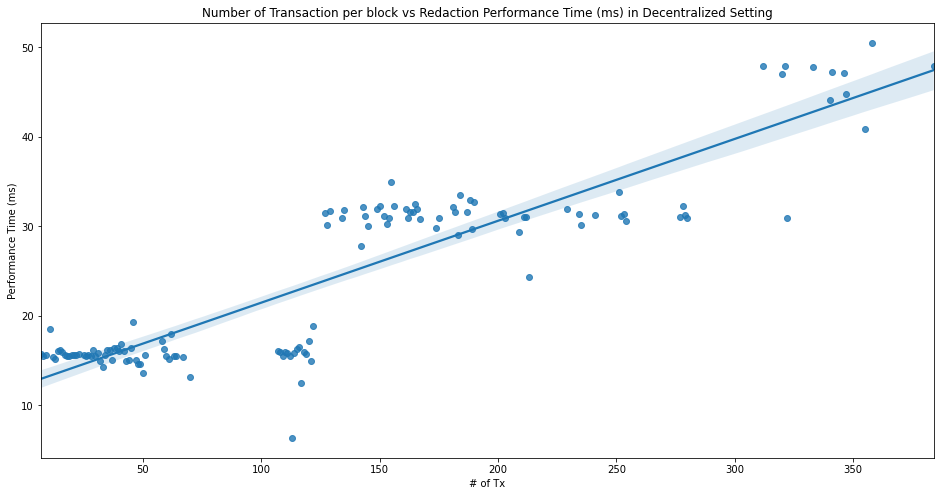

In [9]:
df_den = pd.read_csv('tx_time_den.csv', delimiter=',')
df_den.drop_duplicates(subset='# of Tx', inplace=True, keep='first')
for i, r in df_den.iterrows():
    if r['Performance Time (ms)'] == 0:
        df_den.drop(i, inplace=True)
    if r['# of Tx'] >= 500:
        df_den.drop(i, inplace=True)
fig_dims = (16, 8)
fig, ax = plt.subplots(figsize=fig_dims)
ax.set_title('Number of Transaction per block vs Redaction Performance Time (ms) in Decentralized Setting')

sns.regplot(data=df_den, 
            x='# of Tx',
            y='Performance Time (ms)',
            ax=ax)

In [10]:
df1 = pd.read_csv('block_time.csv', delimiter=',')
df1.drop_duplicates(subset='Blockchain Length', inplace=True, keep='first')
df1.sort_values(by='Blockchain Length', inplace=True)
df1.head(10)

,Miner ID,Block Depth,Transaction ID,Redaction Profit,Performance Time (ms),Blockchain Length,# of Tx
0,0,1,24644555149,0.063475,29.661655,1,1746
3,0,1,4352925647,0.004109,36.772013,2,1843
1,0,1,96796042692,0.023368,33.578873,3,1852
2,0,4,6459536293,0.012039,45.186758,4,1859
7,0,4,73430913446,0.045158,29.739380,5,1925
4,0,1,10367606377,0.002789,36.569834,6,1902
6,0,3,36997145457,0.011665,31.383514,7,1844
5,0,1,48941830254,0.015814,31.007290,8,1793
8,0,7,26819941335,0.014008,22.945642,10,1879
9,0,11,4885943825,0.031907,34.948111,12,1819


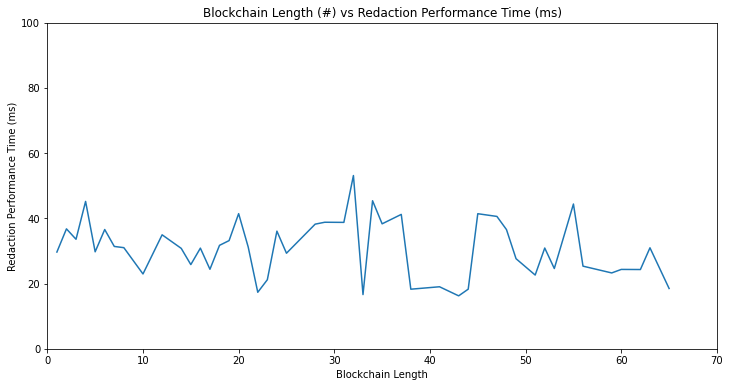

In [11]:
# The average number of transaction per block is about 1800-2500.

fig, ax = plt.subplots(figsize=(12, 6))

ax.set_title('Blockchain Length (#) vs Redaction Performance Time (ms)')
ax.plot(df1['Blockchain Length'], df1['Performance Time (ms)'])

ax.set_xlim([0, 70])
ax.set_ylim([0, 100])

plt.xlabel("Blockchain Length")
plt.ylabel("Redaction Performance Time (ms)")

plt.show()

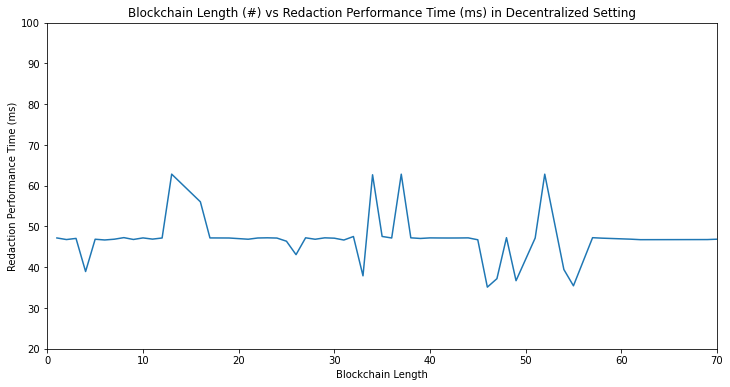

In [15]:
# The average number of transaction per block is about 1800-2500 in decentralized.

df1_den = pd.read_csv('block_time_den.csv', delimiter=',')
df1_den.drop_duplicates(subset='Blockchain Length', inplace=True, keep='first')
df1_den.sort_values(by='Blockchain Length', inplace=True)

fig, ax = plt.subplots(figsize=(12, 6))

ax.set_title('Blockchain Length (#) vs Redaction Performance Time (ms) in Decentralized Setting')
ax.plot(df1_den['Blockchain Length'], df1_den['Performance Time (ms)'])

ax.set_xlim([0, 70])
ax.set_ylim([20, 100])

plt.xlabel("Blockchain Length")
plt.ylabel("Redaction Performance Time (ms)")

plt.show()

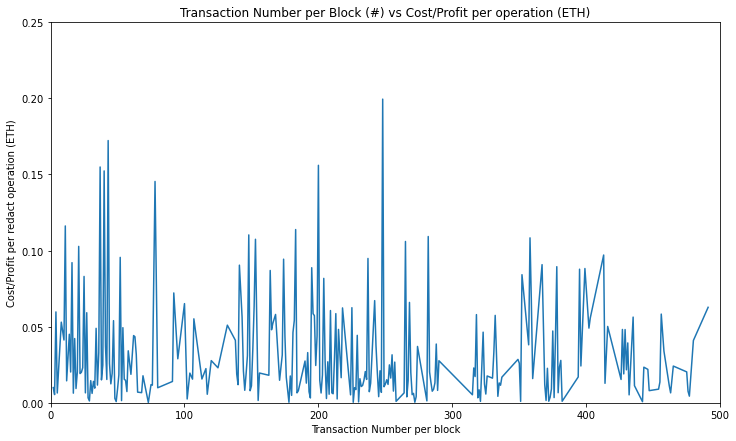

In [17]:
# The average number of transaction per block is about 1800-2500.
# Here, we show how to number of transactions per block can affect the profit/cost per redaction operation
# in Bitcoin stimulation

df2 = df.sort_values(by='# of Tx')

fig, ax = plt.subplots(figsize=(12, 7))

ax.set_title('Transaction Number per Block (#) vs Cost/Profit per operation (ETH)')
ax.plot(df2['# of Tx'], df2['Redaction Profit'])

ax.set_xlim([0, 500])
ax.set_ylim([0, 0.25])

plt.xlabel("Transaction Number per block")
plt.ylabel("Cost/Profit per redact operation (ETH)")

plt.show()

In [19]:
# Here, we show how the increase of total redaction operation will affect the total profit of miner.

df3 = pd.read_csv('profit_redactRuns.csv', delimiter=',')
df3.head()

,Total Profit/Cost,Redact op runs
0,0.000000,0
1,0.006751,1
2,0.109584,2
3,0.180900,3
4,0.045780,4


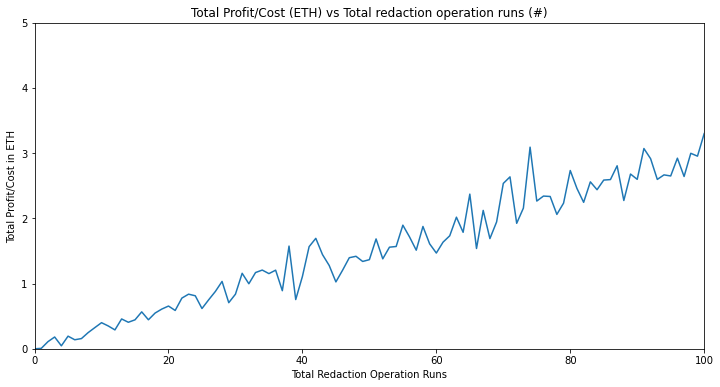

In [20]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.set_title('Total Profit/Cost (ETH) vs Total redaction operation runs (#)')
ax.plot(df3['Redact op runs'], df3['Total Profit/Cost'])

ax.set_xlim([0, 100])
ax.set_ylim([0, 5])

plt.xlabel("Total Redaction Operation Runs")
plt.ylabel("Total Profit/Cost in ETH")

plt.show()